In [7]:
! pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
! pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


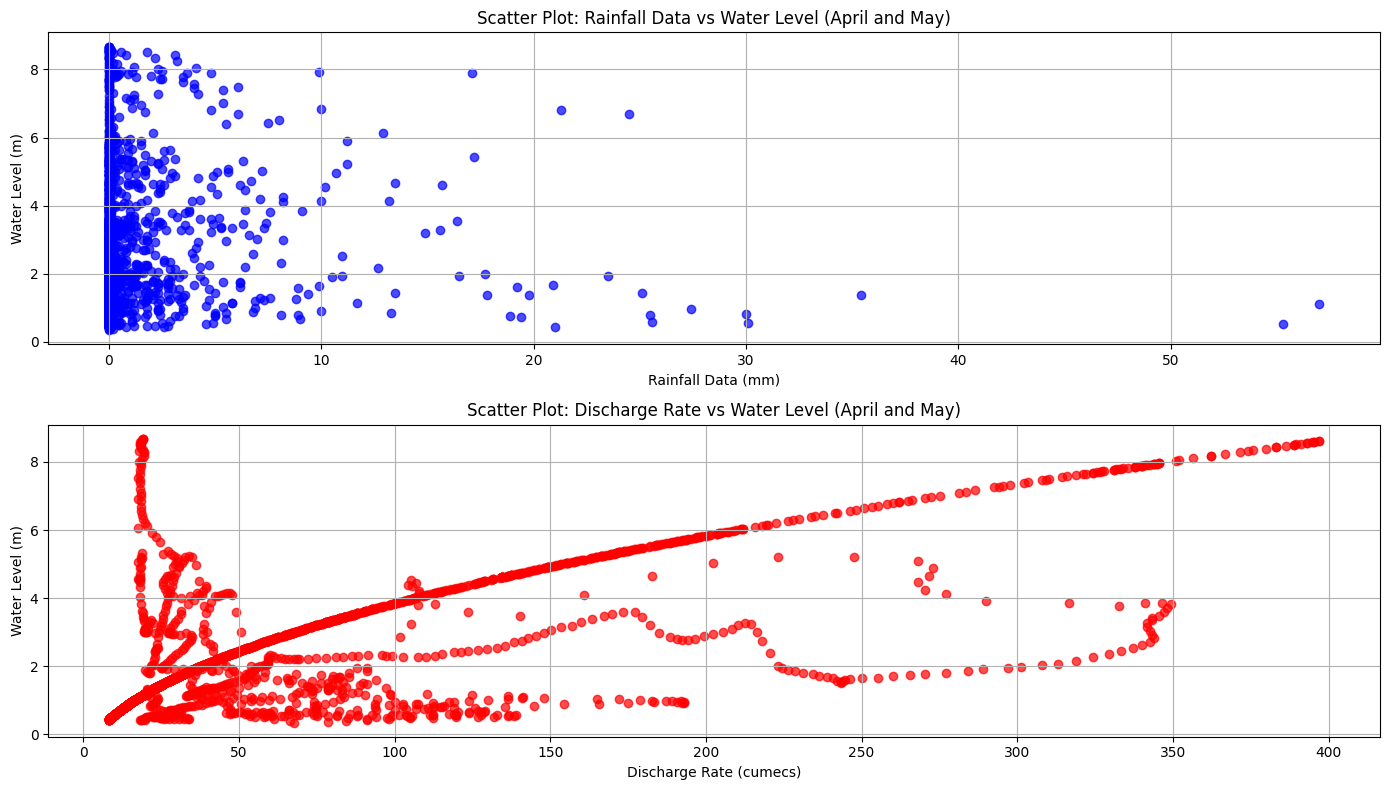

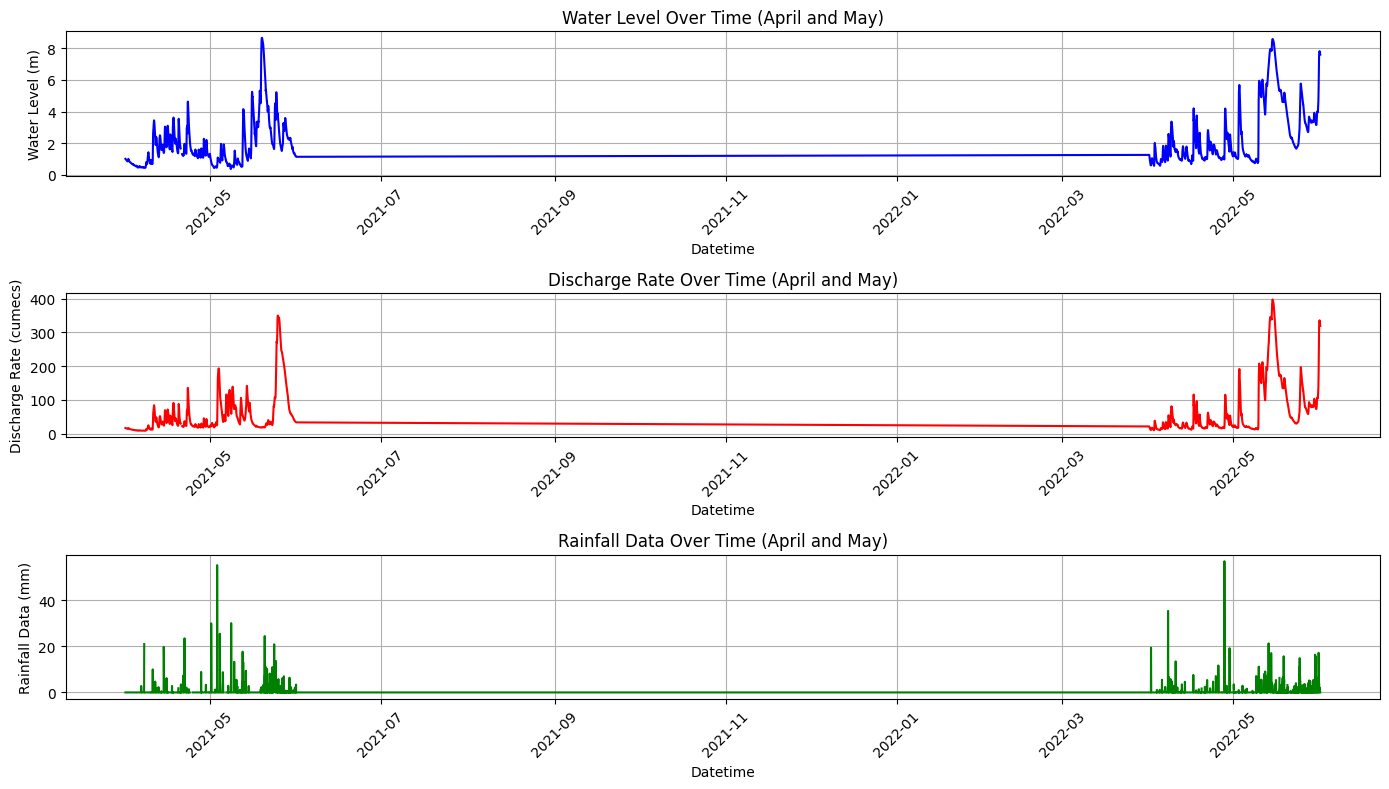

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

# Convert the Date column into a proper datetime format (without specifying format to allow mixed formats)
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')  # Let pandas infer the date format

# Ensure the Hour column is treated as integer (1-24)
df['Hour'] = df['Hour'].astype(int)

# Combine Date and Hour into a single Datetime column
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour'] - 1, unit='h')

# Filter data for the months of April (04) and May (05)
df_filtered = df[df['Date'].dt.month.isin([4, 5])]

# Scatter plots
plt.figure(figsize=(14, 8))

# Scatter plot for Water Level vs. Rainfall Data
plt.subplot(2, 1, 1)
plt.scatter(df_filtered['Rainfall Data (mm)'], df_filtered['Water Level (m)'], color='b', alpha=0.7)
plt.title('Scatter Plot: Rainfall Data vs Water Level (April and May)')
plt.xlabel('Rainfall Data (mm)')
plt.ylabel('Water Level (m)')
plt.grid(True)

# Scatter plot for Discharge Rate vs Water Level
plt.subplot(2, 1, 2)
plt.scatter(df_filtered['Discharge Rate (cumecs)'], df_filtered['Water Level (m)'], color='r', alpha=0.7)
plt.title('Scatter Plot: Discharge Rate vs Water Level (April and May)')
plt.xlabel('Discharge Rate (cumecs)')
plt.ylabel('Water Level (m)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Line charts for Water Level, Discharge Rate, and Rainfall Data over time
plt.figure(figsize=(14, 8))

# Line chart for Water Level over time
plt.subplot(3, 1, 1)
plt.plot(df_filtered['Datetime'], df_filtered['Water Level (m)'], label='Water Level (m)', color='b')
plt.title('Water Level Over Time (April and May)')
plt.xlabel('Datetime')
plt.ylabel('Water Level (m)')
plt.xticks(rotation=45)
plt.grid(True)

# Line chart for Discharge Rate over time
plt.subplot(3, 1, 2)
plt.plot(df_filtered['Datetime'], df_filtered['Discharge Rate (cumecs)'], label='Discharge Rate (cumecs)', color='r')
plt.title('Discharge Rate Over Time (April and May)')
plt.xlabel('Datetime')
plt.ylabel('Discharge Rate (cumecs)')
plt.xticks(rotation=45)
plt.grid(True)

# Line chart for Rainfall Data over time
plt.subplot(3, 1, 3)
plt.plot(df_filtered['Datetime'], df_filtered['Rainfall Data (mm)'], label='Rainfall Data (mm)', color='g')
plt.title('Rainfall Data Over Time (April and May)')
plt.xlabel('Datetime')
plt.ylabel('Rainfall Data (mm)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


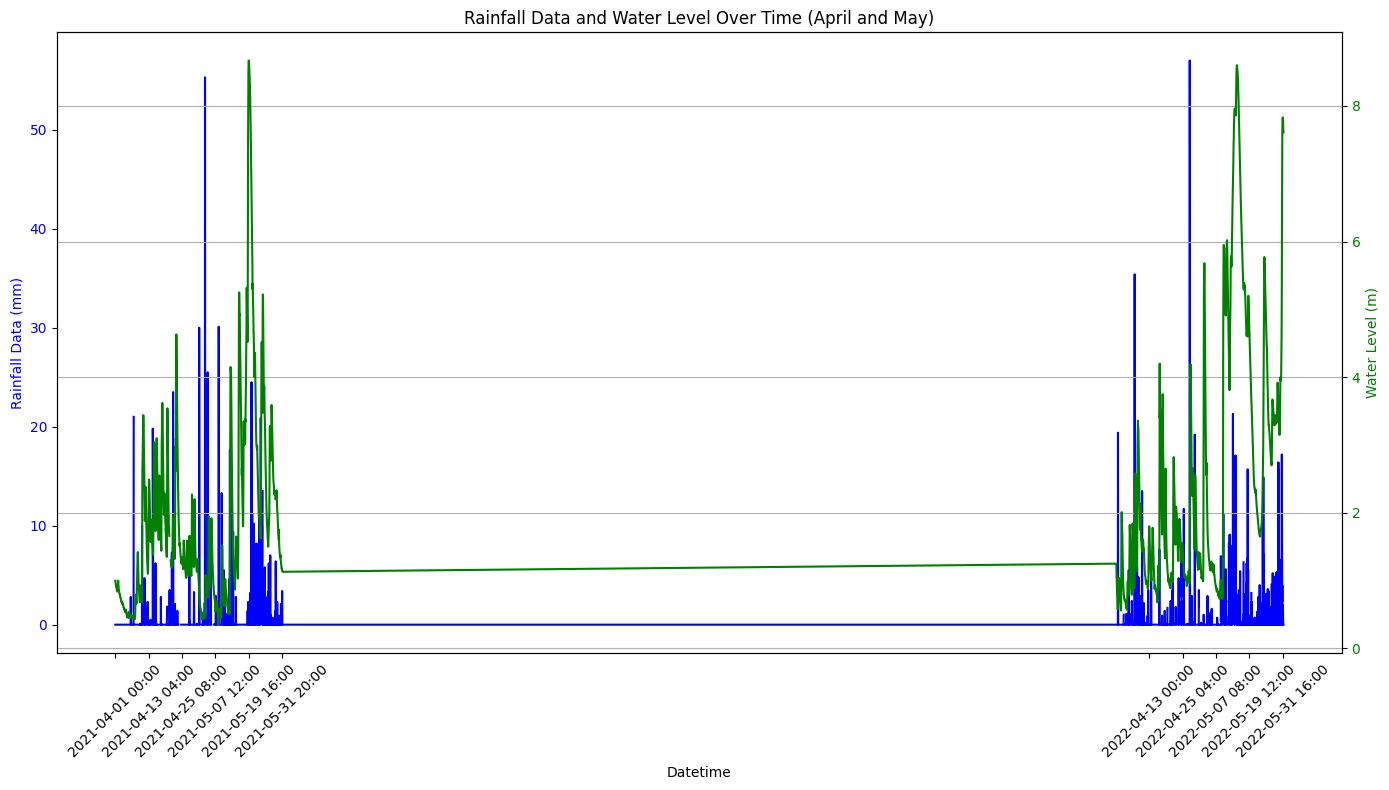

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided CSV file
file_path = 'F:/FYP project/FYP(Flood)/Real Data/new full data.csv'
df = pd.read_csv(file_path)

# Convert the Date column into a proper datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=False, errors='coerce')

# Ensure the Hour column is treated as integer (1-24)
df['Hour'] = df['Hour'].astype(int)

# Combine Date and Hour into a single Datetime column
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour'] - 1, unit='h')

# Filter data for the months of April (04) and May (05)
df_filtered = df[df['Date'].dt.month.isin([4, 5])]

# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot the Rainfall Data on the first y-axis
ax1.set_xlabel('Datetime')
ax1.set_ylabel('Rainfall Data (mm)', color='blue')
ax1.plot(df_filtered['Datetime'], df_filtered['Rainfall Data (mm)'], color='blue', label='Rainfall Data (mm)')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(df_filtered['Datetime'][::int(len(df_filtered)/10)])  # Reduce number of x-ticks for clarity
ax1.set_xticklabels(df_filtered['Datetime'][::int(len(df_filtered)/10)].dt.strftime('%Y-%m-%d %H:%M'), rotation=45)

# Create a second y-axis for the Water Level
ax2 = ax1.twinx()
ax2.set_ylabel('Water Level (m)', color='green')
ax2.plot(df_filtered['Datetime'], df_filtered['Water Level (m)'], color='green', label='Water Level (m)')
ax2.tick_params(axis='y', labelcolor='green')

# Set title
plt.title('Rainfall Data and Water Level Over Time (April and May)')

# Display the plot
fig.tight_layout()
plt.grid(True)
plt.show()
